Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.95      0.82     13422
           1       0.91      0.58      0.70     11773

    accuracy                           0.77     25195
   macro avg       0.81      0.76      0.76     25195
weighted avg       0.81      0.77      0.76     25195


Confusion Matrix:
[[12712   710]
 [ 4989  6784]]

Accuracy: 0.7738043262552093


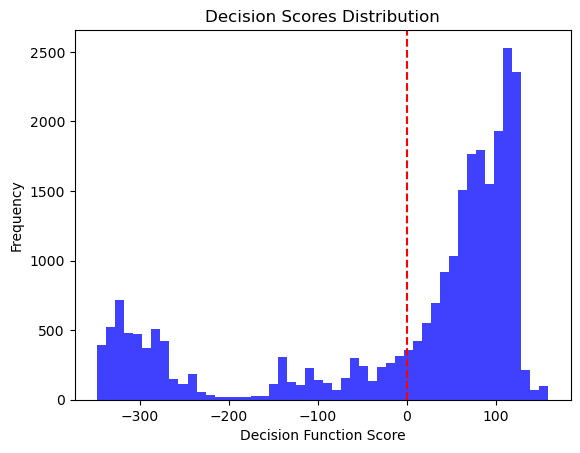

In [3]:
#importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load the Dataset
df = pd.read_csv("KDDTrain.csv")


# Split data into features (X) and labels (y)
X = df.drop(['class'], axis=1)
y = df['class']                

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Spliting X and y to Training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train = X_train[y_train == 0]  # Keep only normal data for training

#Training the model
ocsvm = OneClassSVM(kernel='rbf', nu=0.05, gamma='auto')
ocsvm.fit(X_train)

#Predict Anomalies
y_pred = ocsvm.predict(X_test)

# Convertion predictions to binary format (0 for normal, 1 for anomalies)
y_pred = np.where(y_pred == 1, 0, 1)  # Map 1 -> 0 and -1 -> 1 for consistency with labels

# Evaluating the Model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

# Visualizing the Results
import matplotlib.pyplot as plt
decision_scores = ocsvm.decision_function(X_test)
plt.hist(decision_scores, bins=50, color='blue', alpha=0.75)
plt.title('Decision Scores Distribution')
plt.xlabel('Decision Function Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Decision boundary (0)
plt.show()
